Use different descriptive statistics and plots for answering the question.

In [84]:
import pandas as pd
import numpy as np
from pandas import plotting
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats


In [86]:
data = pd.read_csv ('D:\\Education\\IITM\\2 Trimester\\AI Lab\\Assignment 1\\Cancergeometry.csv')
data.head()
data.shape

(569, 32)

#### Descriptive Statistics
Descriptive statistics summarizes or describes the characteristics of a data set. Descriptive statistics consists of three basic categories of measures: measures of central tendency, measures of variability (or spread), and frequency distribution.

Firstly, we try using histogram. Histogram represents count or percentage of occurrences in the data for each column.

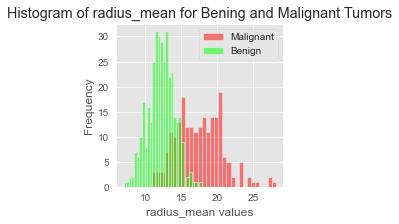

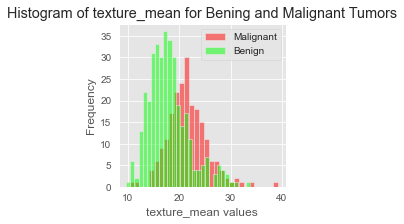

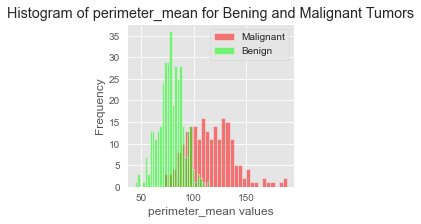

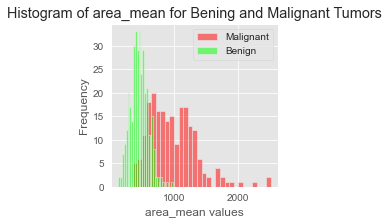

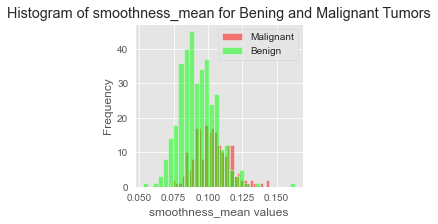

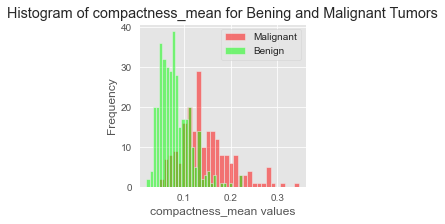

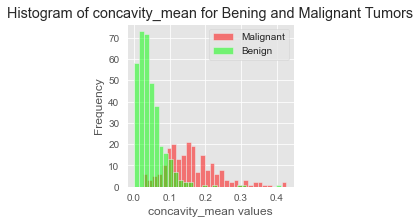

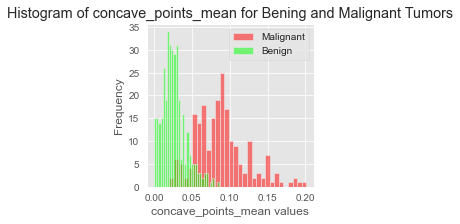

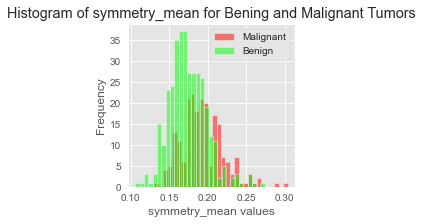

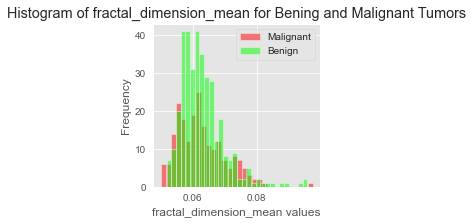

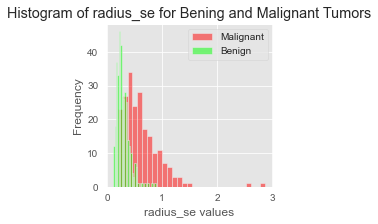

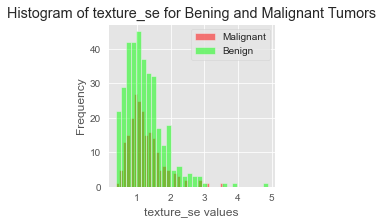

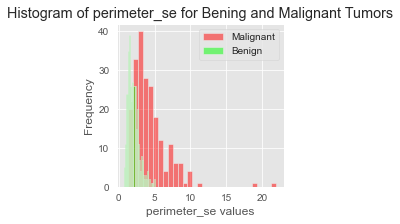

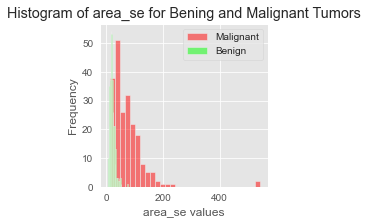

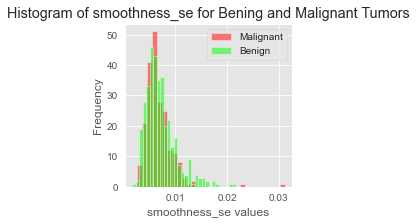

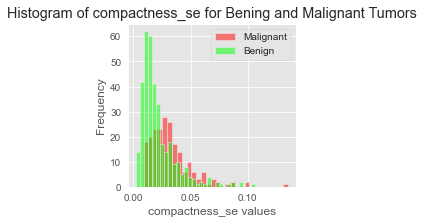

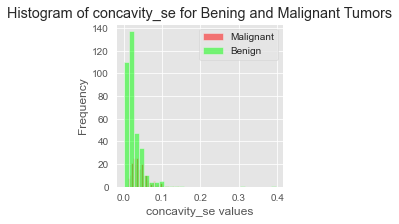

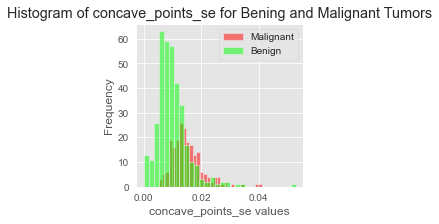

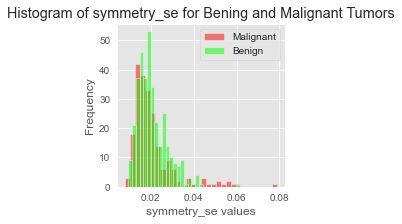

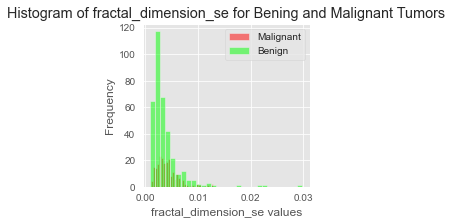

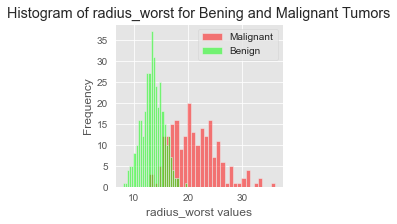

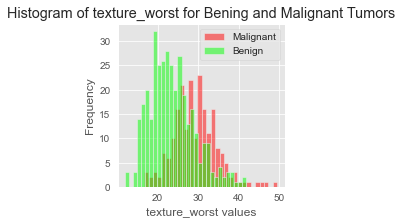

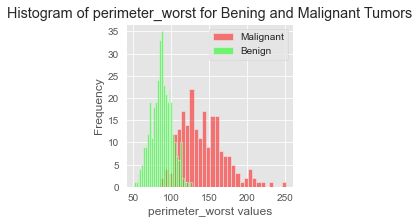

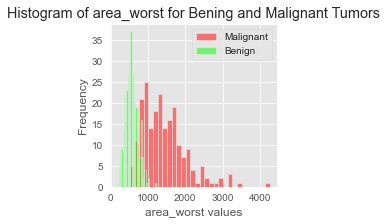

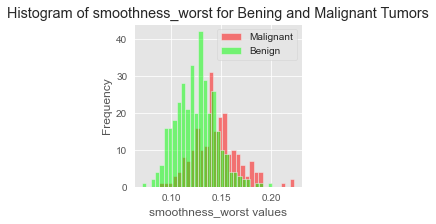

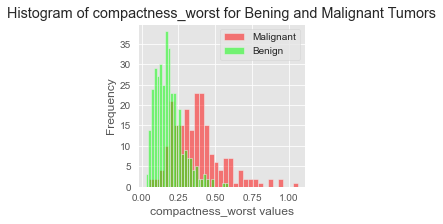

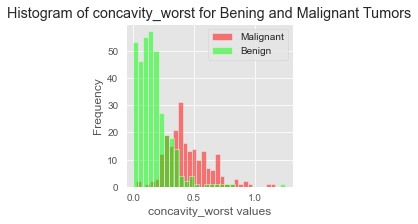

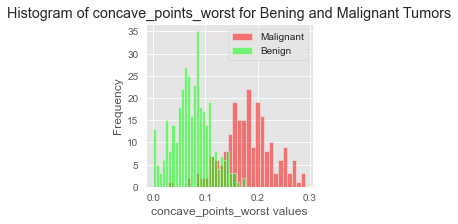

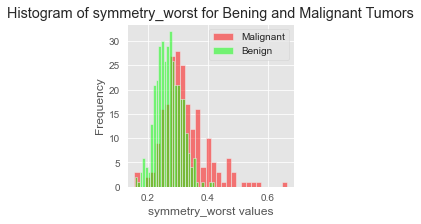

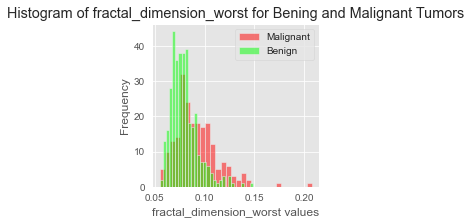

In [87]:
for column in data.columns[1:-1]:
  malignant = data[data["diagnosis"] == "M"]
  benign = data[data["diagnosis"] == "B"]
  #for column2 in malignant:
  f = plt.figure()
  f.set_figwidth(3)
  f.set_figheight(3)
  m = plt.hist ( data[data["diagnosis"] == "M"][column],bins=30,fc=(1,0,0,0.5),label="Malignant")
  n = plt.hist ( data[data["diagnosis"] == "B"][column],bins=30,fc=(0,1,0,0.5),label="Benign")
  plt.legend()
  temp_string = str ( column ) + " values"
  plt.xlabel ( temp_string )
  plt.ylabel("Frequency")
  temp_string = "Histogram of " + str ( column ) + " for Bening and Malignant Tumors"
  plt.title ( temp_string )
  plt.show()

Based on the histograms presented above, we observe that most of the Standard Error columns have similar values for malignant and benign cancer tumors.

Texture in all the data types - mean, standard error and worst values are intercrossing one another.

Hence we can completely consider removing those columns. 
Apart from that, the columns with most overlapping values for malignant and beign tumour, and hence, **least useful columns** as per the histogram based on visual analysis are -
1. texture_mean
2. smoothness_mean
3. symmetry_mean
4. fractal_dimension_mean
5. radius_se - it does not identify benign cell
6. texture_se
7. perimeter_se - it does not identify benign cell
8. area_se - it does not identify benign cell
9. smoothness_se
10. compactness_se
11. concavity_se
12. concave_points_se
13. symmetry_se
14. fractal_dimension_se
15. texture_worst
16. smoothness_worst
17. compactness_worst - it does not identify benign cell

However, histogram is not the best descriptive tool since it simply represents the number of times a certain value has occurred in a column.

To prove how effective our column selection was, we shall build a model before and after column selection.

**Before** -


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = np.array (data[data.columns [ 1: -1 ]])
y = np.array (data[data.columns[-1]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



We observe f1-score of 0.96, which is very good. Let us see how it improves or declines after removal of bad columns.

**After** -

In [89]:
refactored_data = data
refactored_data = refactored_data.drop(['texture_mean', 'smoothness_mean', 'symmetry_mean',
                                        'fractal_dimension_mean','radius_se','texture_se',
                                        'perimeter_se', 'area_se', 'smoothness_se',
                                        'compactness_se', 'concavity_se', 'concave_points_se',
                                        'symmetry_se', 'fractal_dimension_se', 'texture_worst',
                                        'smoothness_worst','compactness_worst'], axis=1)

X_refactored = np.array (refactored_data[refactored_data.columns [ 1: -1 ]])
y_refactored = np.array (refactored_data[refactored_data.columns[-1]])
X_train_refactored, X_test_refactored, y_train_refactored, y_test_refactored = train_test_split(X_refactored, y_refactored, test_size = 0.2, random_state = 42)
reg_log_refactored = LogisticRegression()
reg_log_refactored.fit(X_train_refactored, y_train_refactored)
y_pred_refactored = reg_log_refactored.predict(X_test_refactored)
from sklearn import metrics
print(metrics.classification_report(y_test_refactored, y_pred_refactored))

              precision    recall  f1-score   support

           B       0.99      1.00      0.99        71
           M       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



We observe that the f1-score increases to 0.99 , which is much better than 0.97 score before removing the insignificant columns.

#### Q1. b)
Use the plots to visualize if the variables are highly correlated and report the correlation coefficients for those variables.

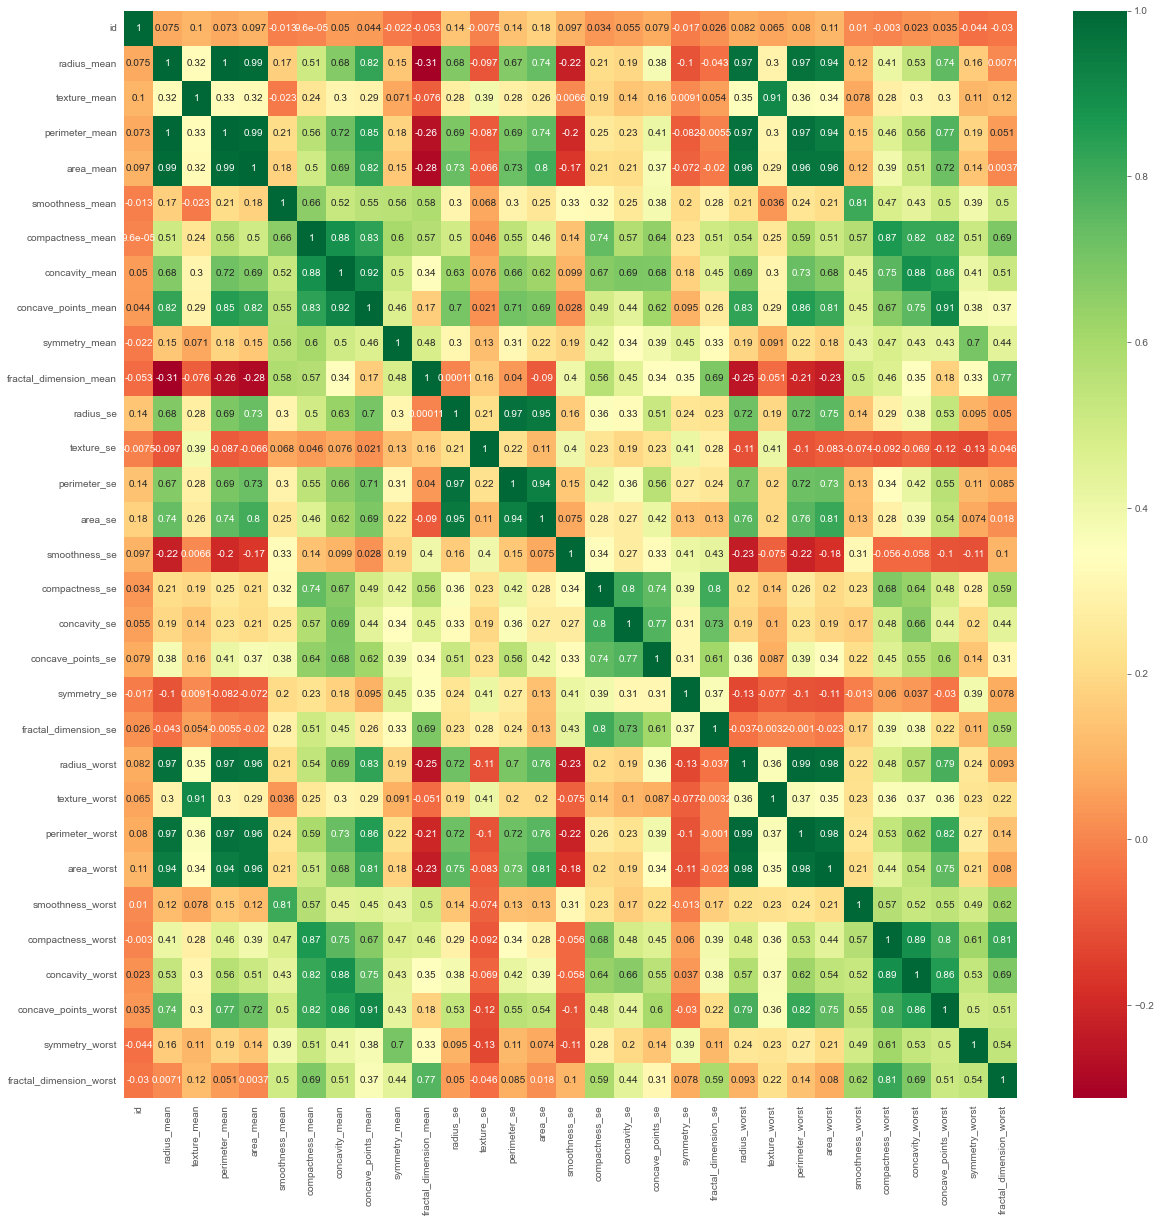

In [90]:
#get correlations of each features in dataset
correlation_map = data.corr()
top_corr_features = correlation_map.index
plt.figure ( figsize = ( 20, 20 ))
#plot heat map
g = sns.heatmap ( data [ top_corr_features ].corr (), annot = True, cmap = "RdYlGn")

Correlation coefficients - 

1. Perimeter mean and radius mean - 0.91
2. Area mean and radius mean - 0.99
3. Radius worst and radius mean - 0.97
4. Perimeter worst and radius mean - 0.97
5. Area worst and radius mean - 0.94
6. Area mean and perimeter mean - 0.99

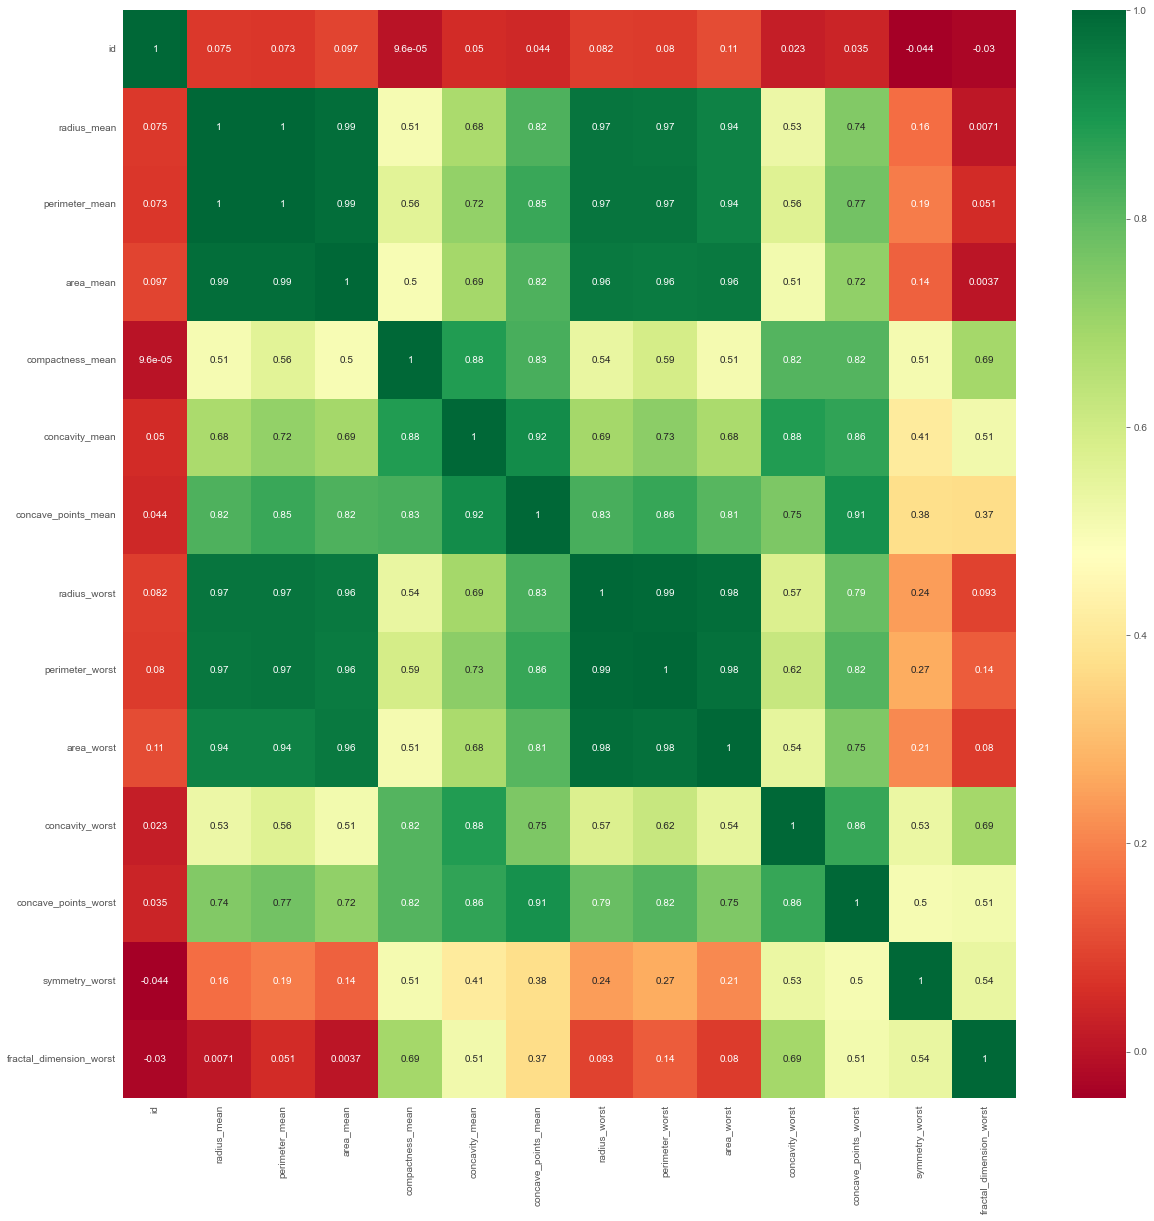

In [91]:
# Correlation scores for the refactored data (after removal of columns indicated 
# by the histogram)
correlation_map = refactored_data.corr()
top_corr_features = correlation_map.index
plt.figure ( figsize = ( 20, 20 ))
#plot heat map
g = sns.heatmap ( data [ top_corr_features ].corr (), annot = True, cmap = "RdYlGn")